<h1>Diabetes Disease Prediction</h1>

<h2>Table of contents</h2>

1. [Introduction](#1)<br>
2. [Business Problem](#2)<br>
3. [Data Description](#3)<br>
4. [Importing Libraries and Dataset](#4)<br>
5. [Exploratory Data Analysis](#5)<br>
6. [Data Visualization](#6)<br>
   A. [Distribution Plot](#6A)<br>
   B. [Correlation](#6B)<br>
7. [Classification Models](#7)<br>
   A. [Logistic Regression](#7A)<br>
   B. [K Nearest Neighbors](#7B)<br>
   C. [Support Vectors Classifier](#7C)<br>
   D. [Random Forest Classifier](#7D)<br>
   E. [Gradient Boosting Classifier](#7E)<br>
   F. [Ada Boost Classifier](#7F)<br>
   G. [XG Boost Classifier](#7G)<br>
8. [ML Models Accuracy](#8)<br>
9. [Generate the pickle file](#9)<br>
<hr>


<h3>Introduction</h3><a id="1"></a>
<p>Diabetes mellitus, commonly known as diabetes is a metabolic disease that causes high blood sugar. The hormone insulin moves sugar from the blood into your cells to be stored or used for energy. With diabetes, your body either doesn’t make enough insulin or can’t effectively use the insulin it does make.</p>

<p>Untreated high blood sugar from diabetes can damage your nerves, eyes, kidneys, and other organs.<br>

Blood Sugar level less than 140mg/dL is normal.<br>
A reading of more than 200mg/dL after two hours indicates diabetes.<br>
A reading between 140 and 199mg/dL indicates prediabetes.</p>

<h3>Business Problem</h3><a id="2"></a>

To build suitable Machine Learning Model for Diabetes Prediction on the Piama Indians data set. Also, create an API.

<h3>Data Description</h3><a id="3"></a>
This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within upcoming years.

Fields description follow:

| Column Name              | | Description                                                                        |
| ------------------------ | | ---------------------------------------------------------------------------------- |
| Pregnancies              | | Number of times pregnant                                                           |
| Glucose                  | | Plasma glucose concentration a 2 hours in an oral glucose tolerance test           |
| BloodPressure            | | Diastolic blood pressure (mm Hg)                                                   |
| SkinThickness            | | Triceps skin fold thickness (mm)                                                   |
| Insulin                  | | 2-Hour serum insulin (mu U/ml)                                                     |
| BMI                      | | Body mass index (weight in kg/(height in m)$^2)$                                   |
| DiabetesPedigreeFunction | | Diabetes pedigree function                                                         |                     
| Age                      | | Age (years)                                                                        |
| Outcome                  | | Class variable (1: tested positive for diabetes, 0: tested negative for diabetes)  |


<h3>Importing Libraries and Dataset</h3><a id="4"></a>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_roc_curve

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Method to get Meta-Data about any dataframe passed 
def getMetadata(dataframe) :
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes,              # data types of columns
                    'Total_Element': dataframe.count(),         # total elements in columns
                    'Null_Count': dataframe.isnull().sum(),     # total null values in columns
                    'Null_Percentage': round(dataframe.isnull().sum()/len(dataframe) * 100,2),    # percentage of null values
                    'Unique_Value': dataframe.nunique()
                       })
    return metadata_matrix

# This function generate text to be displayed in confusion matrix plot
def cm_text_generator(cf,
                      group_names= ['True Positive', 'False Negative', 'False Positive', 'True Negative'],
                      count= True,
                      percent= True):
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
    return box_labels

In [3]:
# Reading 'pima-indians-diabetes.csv' data
df = pd.read_csv('Pima Indians diabetes.csv')

# Top 10 records:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<h2>Exploratory Data Analysis</h2><a id="5"></a>

In [4]:
# Shape of dataset:
df.shape

(768, 9)

In [5]:
# Produce Metadata in a dataframe 
getMetadata(dataframe= df)

,Datatype,Total_Element,Null_Count,Null_Percentage,Unique_Value
Pregnancies,int64,768,0,0.0,17
Glucose,int64,768,0,0.0,136
BloodPressure,int64,768,0,0.0,47
SkinThickness,int64,768,0,0.0,51
Insulin,int64,768,0,0.0,186
BMI,float64,768,0,0.0,248
DiabetesPedigreeFunction,float64,768,0,0.0,517
Age,int64,768,0,0.0,52
Outcome,int64,768,0,0.0,2


In [6]:
# Descriptive data summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h2>Data Visualization</h2><a id="6"></a>

<h3>Distribution Plot</h3><a id='6A'>

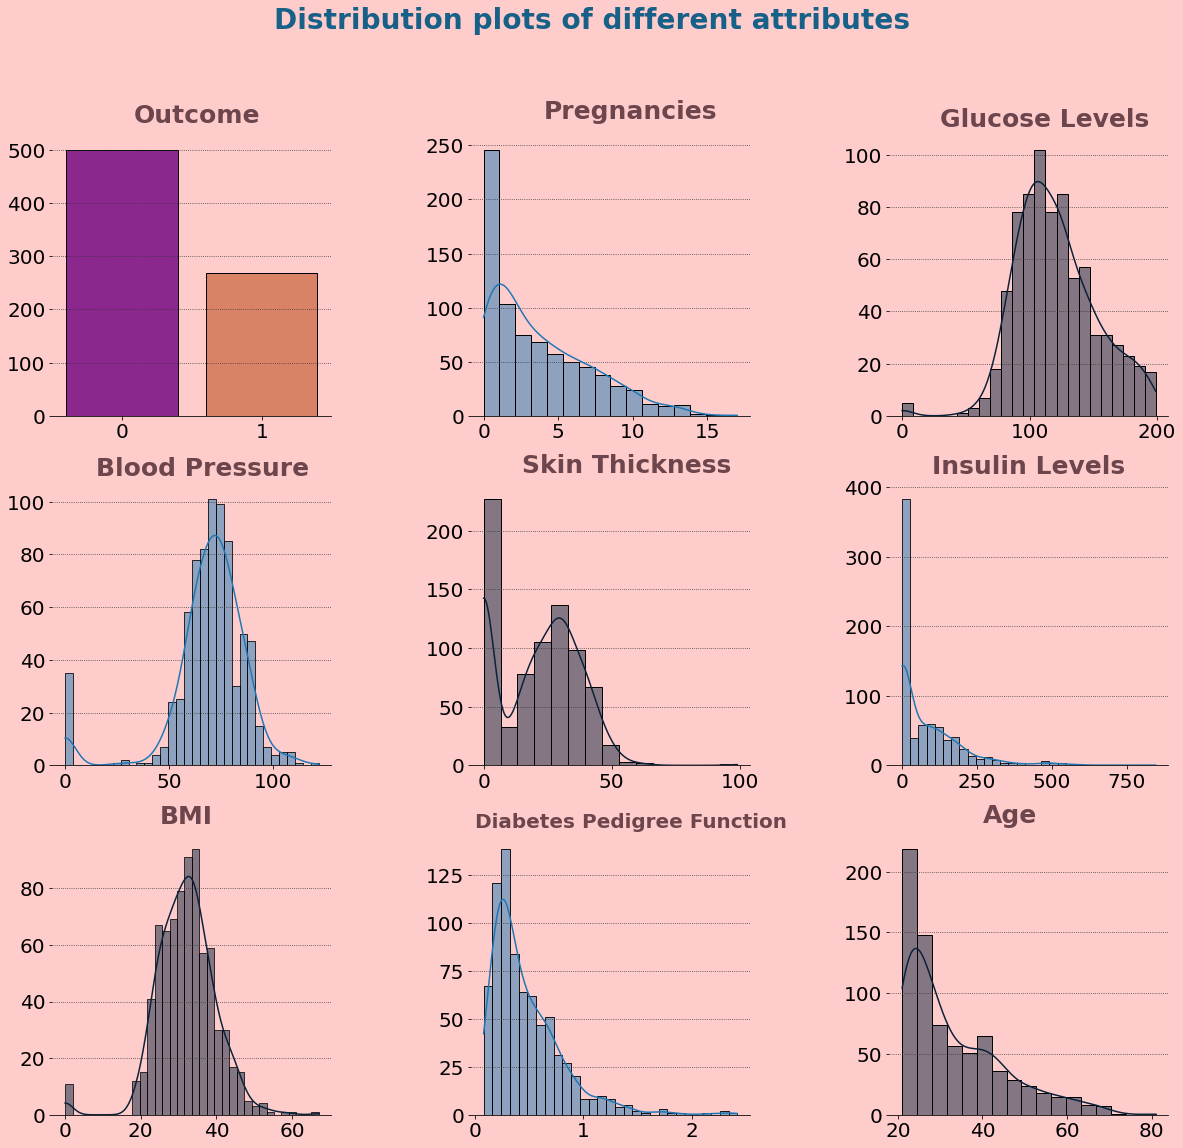

In [7]:
fig = plt.figure(figsize=(20,18))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#FFCCCC"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)


ax0.text(0.08, 550, 'Outcome', fontsize=25, color='#6D454C', weight='bold')
ax0.grid(axis='y', color="#333", linestyle=':')
ax0.tick_params(axis='both', which='major', labelsize=20)
sns.countplot(x='Outcome', data=df, palette="plasma", ax=ax0, edgecolor="black").set(xlabel="", ylabel="")

ax1.text(4, 275, 'Pregnancies', fontsize=25, color='#6D454C', weight='bold')
ax1.grid(axis='y', color="#333", linestyle=':')
ax1.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='Pregnancies', data=df, palette="plasma", ax=ax1, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax2.text(30, 111, 'Glucose Levels', fontsize=25, color='#6D454C', weight='bold')
ax2.grid(axis='y', color="#333", linestyle=':')
ax2.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='Glucose', data=df, color='#0A2239', ax=ax2, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax3.text(15, 110, 'Blood Pressure', fontsize=25, color='#6D454C', weight='bold')
ax3.grid(axis='y', color="#333", linestyle=':')
ax3.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='BloodPressure', data=df, palette="plasma", ax=ax3, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax4.text(15, 250, 'Skin Thickness', fontsize=25, color='#6D454C', weight='bold')
ax4.grid(axis='y', color="#333", linestyle=':')
ax4.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='SkinThickness', data=df, color='#0A2239', ax=ax4, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax5.text(100, 420, 'Insulin Levels', fontsize=25, color='#6D454C', weight='bold')
ax5.grid(axis='y', color="#333", linestyle=':')
ax5.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='Insulin', data=df, palette="plasma", ax=ax5, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax6.text(25, 103 , 'BMI', fontsize=25, color='#6D454C', weight='bold')         
ax6.grid(axis='y', color="#333", linestyle=':')
ax6.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='BMI', data=df, color='#0A2239', ax=ax6, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax7.text(0, 150, 'Diabetes Pedigree Function', fontsize=20, color='#6D454C', weight='bold')
ax7.grid(axis='y', color="#333", linestyle=':')
ax7.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='DiabetesPedigreeFunction', data=df, palette="plasma", ax= ax7, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax8.text(40, 240, 'Age', fontsize=25, color='#6D454C', weight='bold')               
ax8.grid(axis='y', color="#333", linestyle=':')
ax8.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='Age', data=df, color='#0A2239', ax= ax8, edgecolor="black", kde=True).set(xlabel="", ylabel="") 

fig.suptitle('Distribution plots of different attributes', fontsize="28", weight="bold", color="#176087")


for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

<h5 style='color:green'>Interpretations from the above graphs :</h5>
<blockquote>
    <ul>
        <li><b>Pregnancies</b>, <b>Insulin</b>, <b>DiabetesPedigreeFunction</b> and <b>Age</b> features are highly right skewed. I'll have to normalize it before using it for the model building.</li>
        <li>Dataset contains more number of people having <b>pregnancies</b> between 0 and 5.</li>
        <li>Lot of people have <b>glucose levels</b> between 100 and 200 mg/dL. People with Glucose levels between 140mg/dL and 199mg/dL are considered to be prediabetic.</li>
        <li>Large number of people have <b>blood pressure</b> between 50 and 100 mmHg</li>
        <li>More number of people have <b>Skin Thickness</b> of 0, but a large number of people have skin thinkness between 0 to 37.5</li>
        <li>Large number of people with <b>insulin level</b> of 0. Mostly insulin levels of 0 are seen in Type 1 diabetic patients.</li>
        <li>There are a lot of people in the <b>BMI</b> range of 20 and 50. A healthy adult should have a BMI between 18.5 and 24.9. This dataset obviously has many people who are either overweight or obese.</li>
        <li>Large number of people have <b>Diabetes PedigreeFunction</b> between 0 and 1</li>
        <li>Dataset contains more number of people between the <b>age</b> of 20-40 years.</li>        
    </ul>
</blockquote>

<h3>Correlation</h3><a id='6B'>

<h4>Correlation Matrix</h4>

<AxesSubplot:>

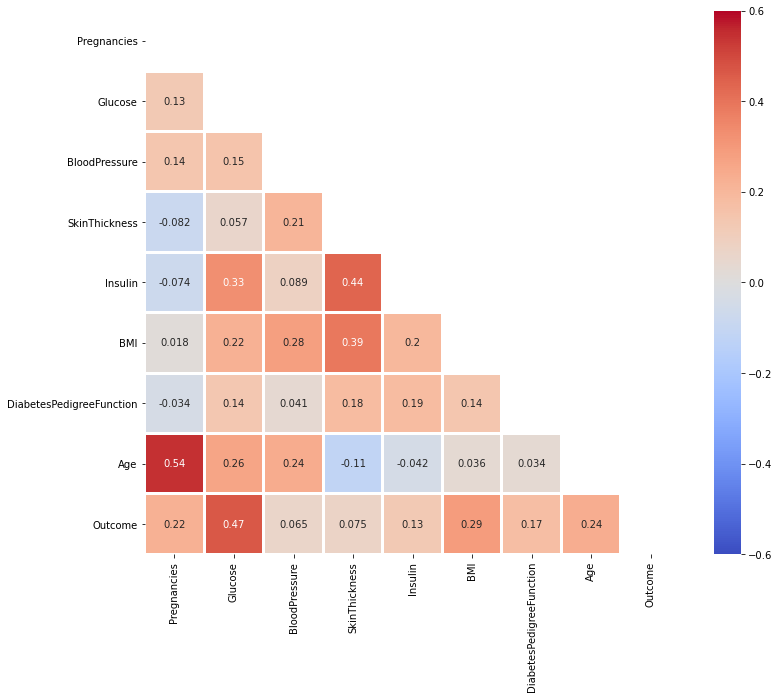

In [8]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask=matrix, linecolor='white', linewidths=2, vmin= -0.6 , vmax= 0.6)

<h4>Bivariate Positive Correlation</h4><a id='6C'>

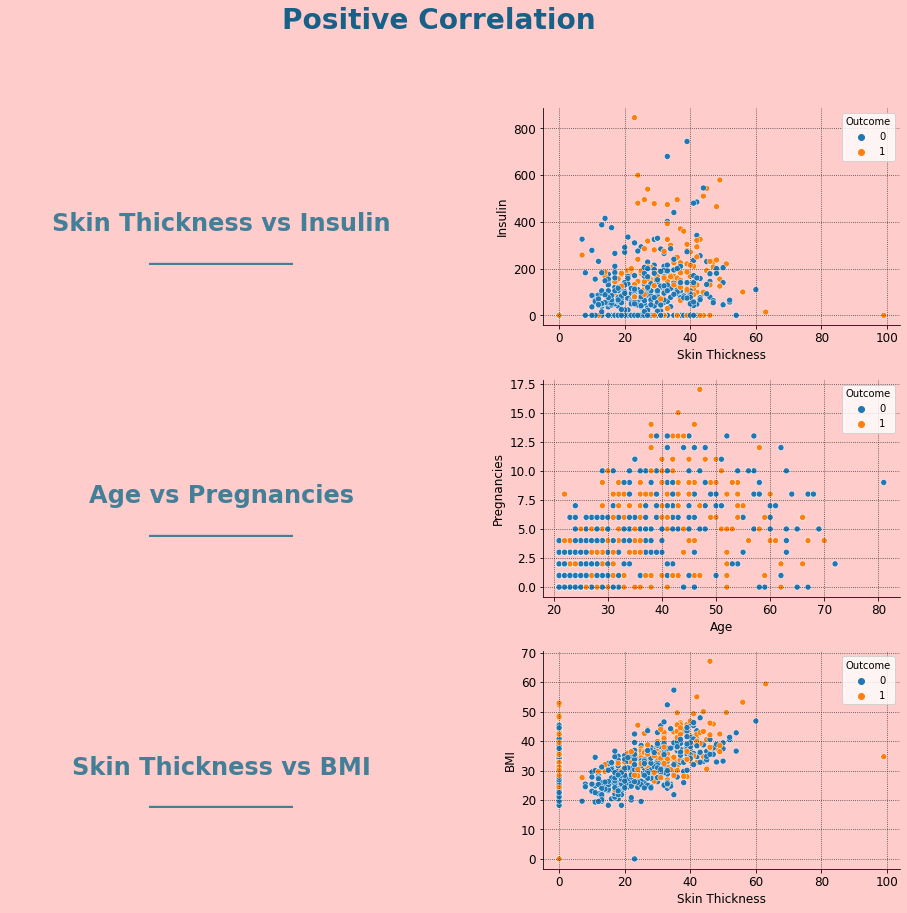

In [9]:
fig = plt.figure(figsize=(16,14))
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])

background_color = "#FFCCCC"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color)


ax0.tick_params(axis= 'both',left= False, bottom= False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.6, 0.4, "Skin Thickness vs Insulin\n____________", horizontalalignment = 'center', verticalalignment = 'center',
         fontsize = 24, fontweight= 'bold', fontfamily= 'sans-serif', color= '#437F97')

ax1.grid(axis= 'both', color= "#333", linestyle= ':')
ax1.tick_params(axis= 'both', which= 'major', labelsize= 12)
ax1.set_xlabel('Skin Thickness', fontsize= 12)
ax1.set_ylabel('Insulin', fontsize= 12)
sns.scatterplot(x= "SkinThickness", y= "Insulin", data= df, ax= ax1, hue= "Outcome")

ax2.tick_params(axis= 'both',left= False, bottom= False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.text(0.6, 0.4, "Age vs Pregnancies\n____________", horizontalalignment = 'center', verticalalignment = 'center',
         fontsize = 24, fontweight= 'bold', fontfamily= 'sans-serif', color='#437F97')

ax3.grid(axis= 'both', color= "#333", linestyle= ':')
ax3.tick_params(axis= 'both', which= 'major', labelsize= 12)
ax3.set_xlabel('Age', fontsize= 12)
ax3.set_ylabel('Pregnancies', fontsize= 12)
sns.scatterplot(x= "Age", y= "Pregnancies", data= df, ax= ax3, hue= "Outcome")

ax4.tick_params(axis= 'both', left= False, bottom= False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.6, 0.4, "Skin Thickness vs BMI\n____________", horizontalalignment = 'center', verticalalignment = 'center',
         fontsize = 24, fontweight= 'bold', fontfamily= 'sans-serif', color= '#437F97')

ax5.grid(axis= 'both', color= "#333", linestyle= ':')
ax5.tick_params(axis= 'both', which= 'major', labelsize= 12)
ax5.set_xlabel('Skin Thickness', fontsize= 12)
ax5.set_ylabel('BMI', fontsize= 12)
sns.scatterplot(x= "SkinThickness", y= "BMI", data= df, ax= ax5, hue= "Outcome")

fig.suptitle('Positive Correlation', fontsize="28", 
             weight="bold", color="#176087")

for s in ["top","right","left", "bottom"]:
    ax0.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    
for s in ["top","right"]:
    ax1.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

<h5 style='color:green'>Interpretations from the above graphs :</h5>
<blockquote>
    <ul>
        <li>Skin Thickness vs Insulin shows the larger the skin thickness and higher the insulin values contributes to diabetes.</li> 
        <li>Age vs Pregnancies shows minorly that with low number of pregnancy and lessor age the person tends to not have Diabetes. But with increase in age and number of pregnancies chances of getting diabetes increases.</li>
        <li><b>Now some people may think that if there is high level of insulin then why isn't Diabetes balanced?</b> It happens when the body doesn't respond properly to the insulin produced. So this leads to diabetes and also increased insulin levels.</li>
        <li>Skin Thickness vs BMI shows higher BMI and  larger skin thickness contributes to Diabetes. BMI greater than 25 is already defined as overweight and there are many people in this dataset with BMI greater than 30.</li>             
    </ul>
</blockquote>

<h4>Bivariate Negative Correlation</h4><a id='6D'>

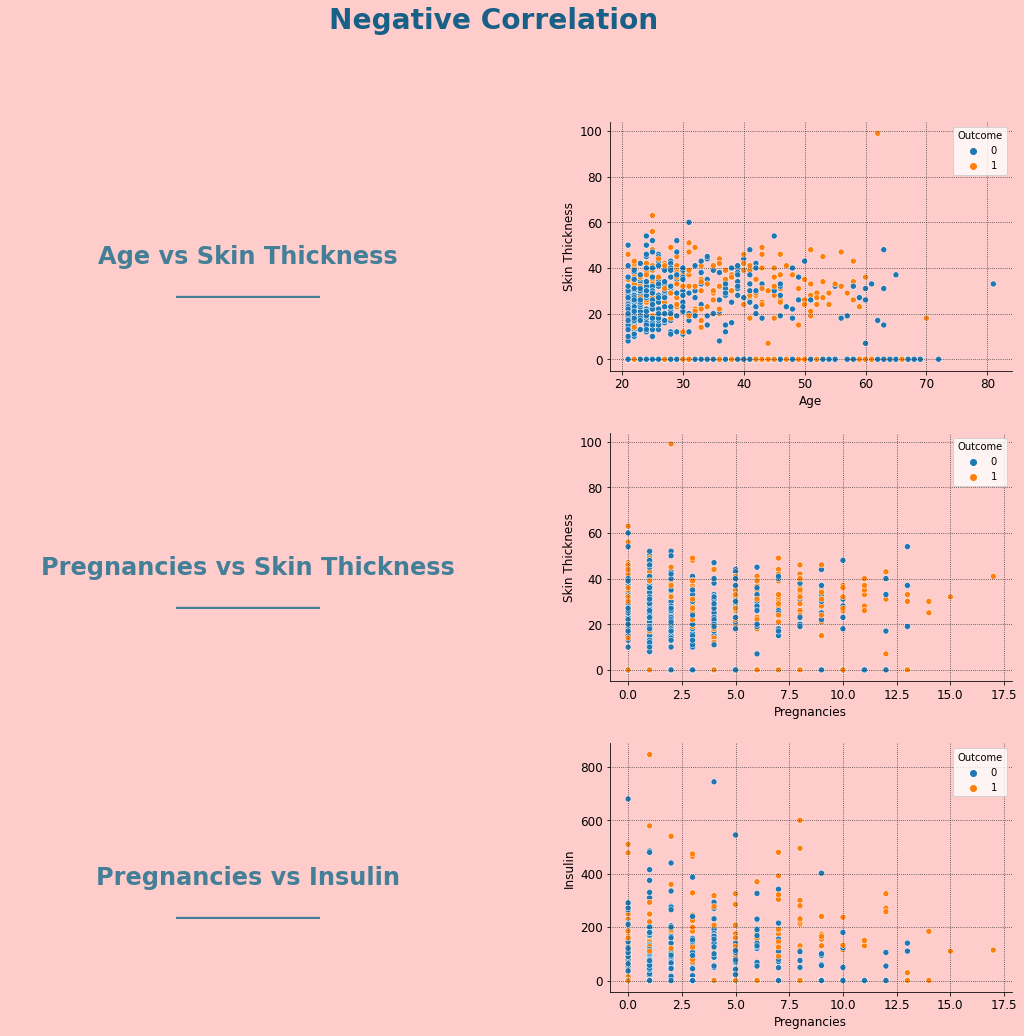

In [10]:
fig = plt.figure(figsize= (18, 16))
gs = fig.add_gridspec(3, 2)
gs.update(wspace= 0.5, hspace= 0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

background_color = "#FFCCCC"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)

ax0.tick_params(axis= 'both', left= False, bottom= False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.6, 0.4, "Age vs Skin Thickness\n____________", horizontalalignment= 'center', verticalalignment= 'center',
         fontsize= 24, fontweight= 'bold', fontfamily= 'sans-serif', color= '#437F97')

ax1.grid(axis= 'both', color= '#333', linestyle= ':')
ax1.tick_params(axis= 'both', which= 'major', labelsize= 12)
ax1.set_xlabel('Age', fontsize= 12)
ax1.set_ylabel('Skin Thickness', fontsize= 12)
sns.scatterplot(x= 'Age', y= 'SkinThickness', data= df, ax= ax1, hue= 'Outcome')

ax2.tick_params(axis= 'both', left= False, bottom= False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.text(0.6, 0.4, "Pregnancies vs Skin Thickness\n____________", horizontalalignment= 'center', verticalalignment= 'center',
         fontsize= 24, fontweight= 'bold', fontfamily= 'sans-serif', color= '#437F97')

ax3.grid(axis= 'both', color= '#333', linestyle= ':')
ax3.tick_params(axis= 'both',  which= 'major', labelsize= 12)
ax3.set_xlabel('Pregnancies', fontsize= 12)
ax3.set_ylabel('Skin Thickness', fontsize= 12)
sns.scatterplot(x= 'Pregnancies', y= 'SkinThickness', data= df, ax= ax3, hue= 'Outcome')

ax4.tick_params(axis= 'both', left= False, bottom= False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.6, 0.4, "Pregnancies vs Insulin\n____________", horizontalalignment= 'center', verticalalignment= 'center',
         fontsize= 24, fontweight= 'bold', fontfamily= 'sans-serif', color= '#437F97')

ax5.grid(axis= 'both', color= '#333', linestyle= ':')
ax5.tick_params(axis= 'both',  which= 'major', labelsize= 12)
ax5.set_xlabel('Pregnancies', fontsize= 12)
ax5.set_ylabel('Insulin', fontsize= 12)
sns.scatterplot(x= 'Pregnancies', y= 'Insulin', data= df, ax= ax5, hue= 'Outcome')

fig.suptitle('Negative Correlation', fontsize="28", weight="bold", color="#176087")

for s in ["top","right","left", "bottom"]:
    ax0.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    
for s in ["top","right"]:
    ax1.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)   

<h5 style='color:green'>Interpretations from the above graphs :</h5>
<blockquote>
    <ul>
        <li>Age vs Skin Thickness shows minorly that with lesser skin thickness and lesser age the person tends to not have diabetes. But with increase in age and increase in skin thickness chances of getting diabetes increases.</li> 
        <li>Pregnancies vs Skin Thickness shows minorly that with lesser pregnancies there is more skin thickness but more number of pregnancies there is less skin thickness. There is negative correlation between them.</li>
        <li>Pregnancies vs Insulin shows minorly that with lesser pregnancies there is increase in insulin level but with more number of pregnancies there is decrease in insulin level, increases chances of getting diabetes.</li>           
    </ul>
</blockquote>

<h4>Check how many missing values as zero</h4>

In [11]:
# Let's check zeroes as missing value in respective feature column
print("Total number of rows: {}".format(len(df)))
print("\nNumber of rows missing in Glucose column: {}".format(len(df[df['Glucose'] == 0])))
print("\nNumber of rows missing in BloodPressure column: {}".format(len(df[df['BloodPressure'] == 0])))
print("\nNumber of rows missing in SkinThickness column: {}".format(len(df[df['SkinThickness'] == 0])))
print("\nNumber of rows missing in Insulin column: {}".format(len(df[df['Insulin'] == 0])))
print("\nNumber of rows missing in BMI column: {}".format(len(df[df['BMI'] == 0])))
print("\nNumber of rows missing in DiabetesPedigreeFunction column: {}".format(len(df[df['DiabetesPedigreeFunction'] == 0])))

Total number of rows: 768

Number of rows missing in Glucose column: 5

Number of rows missing in BloodPressure column: 35

Number of rows missing in SkinThickness column: 227

Number of rows missing in Insulin column: 374

Number of rows missing in BMI column: 11

Number of rows missing in DiabetesPedigreeFunction column: 0


In [12]:
# Target Feature
print("Diabetes People     : {}".format(df['Outcome'].value_counts()[1]))
print("Non-diabetes People : {}".format(df['Outcome'].value_counts()[0]))

Diabetes People     : 268
Non-diabetes People : 500


<h3>Preparing Data for Models</h3>

In [13]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_column = ['Outcome']

X = df[feature_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy="mean")
X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = imputer.fit_transform(X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] )
X_test[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = imputer.fit_transform(X_test[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [15]:
print(X_train.shape)
print(X_test.shape)

(537, 8)
(231, 8)


<h2>Classification Models</h2><a id="7"></a>

<h3>Logistic Regression</h3><a id="7A"></a>

In [16]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()    
lr_classifier.fit(X_train, y_train)
prediction1 = lr_classifier.predict(X_test)  

print('Confusion Matrix:\n', confusion_matrix(y_test, prediction1))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction1))

Confusion Matrix:
 [[124  27]
 [ 32  48]]


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



<h4>Hyper Paramter Optimization</h4>

In [17]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iter = [50,100,150,200,250,300]
multi_class = ['auto', 'ovr', 'multinomial']

param_grid = {'solver': solvers,
               'penalty': penalty,
               'C': c_values,
               'max_iter': max_iter,
               'multi_class': multi_class}

In [18]:
## Hyperparameter optimization using GridSearchCV
random_search = RandomizedSearchCV(estimator= lr_classifier, param_distributions= param_grid, cv=5, verbose=2)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] solver=saga, penalty=l2, multi_class=ovr, max_iter=100, C=1.0 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  solver=saga, penalty=l2, multi_class=ovr, max_iter=100, C=1.0, total=   0.4s
[CV] solver=saga, penalty=l2, multi_class=ovr, max_iter=100, C=1.0 ...
[CV]  solver=saga, penalty=l2, multi_class=ovr, max_iter=100, C=1.0, total=   0.0s
[CV] solver=saga, penalty=l2, multi_class=ovr, max_iter=100, C=1.0 ...
[CV]  solver=saga, penalty=l2, multi_class=ovr, max_iter=100, C=1.0, total=   0.0s
[CV] solver=saga, penalty=l2, multi_class=ovr, max_iter=100, C=1.0 ...
[CV]  solver=saga, penalty=l2, multi_class=ovr, max_iter=100, C=1.0, total=   0.0s
[CV] solver=saga, penalty=l2, multi_class=ovr, max_iter=100, C=1.0 ...
[CV]  solver=saga, penalty=l2, multi_class=ovr, max_iter=100, C=1.0, total=   0.0s
[CV] solver=liblinear, penalty=l1, multi_class=multinomial, max_iter=50, C=10 
[CV]  solver=liblinear, penalty=l1, multi_class=multinomial, max_iter=50, C=10, total=   0.0s
[CV] solver=liblinear, penalty=l1, multi_class=multinomial, max_iter=50, C=10 
[CV]  solver=liblinear, penalty=l1, multi_class=m

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  solver=liblinear, penalty=l1, multi_class=multinomial, max_iter=50, C=10, total=   0.0s
[CV] solver=liblinear, penalty=l1, multi_class=multinomial, max_iter=50, C=10 
[CV]  solver=liblinear, penalty=l1, multi_class=multinomial, max_iter=50, C=10, total=   0.0s
[CV] solver=newton-cg, penalty=l1, multi_class=ovr, max_iter=200, C=0.1 
[CV]  solver=newton-cg, penalty=l1, multi_class=ovr, max_iter=200, C=0.1, total=   0.0s
[CV] solver=newton-cg, penalty=l1, multi_class=ovr, max_iter=200, C=0.1 
[CV]  solver=newton-cg, penalty=l1, multi_class=ovr, max_iter=200, C=0.1, total=   0.0s
[CV] solver=newton-cg, penalty=l1, multi_class=ovr, max_iter=200, C=0.1 
[CV]  solver=newton-cg, penalty=l1, multi_class=ovr, max_iter=200, C=0.1, total=   0.0s
[CV] solver=newton-cg, penalty=l1, multi_class=ovr, max_iter=200, C=0.1 
[CV]  solver=newton-cg, penalty=l1, multi_class=ovr, max_iter=200, C=0.1, total=   0.0s
[CV] solver=newton-cg, penalty=l1, multi_class=ovr, max_iter=200, C=0.1 
[CV]  solver=new

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'max_iter': [50, 100, 150, 200, 250,
                                                     300],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=2)

In [19]:
random_search.best_estimator_

LogisticRegression(C=10, multi_class='ovr', solver='newton-cg')

In [20]:
log_model = LogisticRegression(C=10, multi_class='ovr', solver='newton-cg')    
log_model.fit(X_train, y_train)
prediction_1 = log_model.predict(X_test)

cf_matrix = confusion_matrix(y_true= y_test, y_pred= prediction_1)
categories = ['0', '1']

<AxesSubplot:>

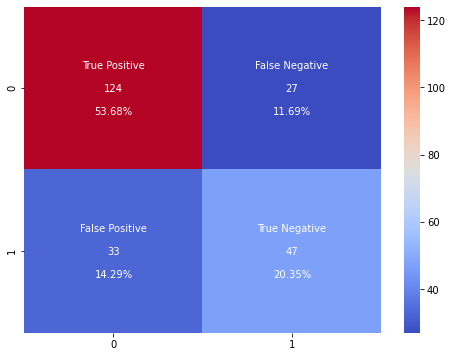

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, annot= cm_text_generator(cf= confusion_matrix(y_true= y_test, y_pred= prediction_1)), fmt="", \
            cmap='coolwarm', xticklabels=categories, yticklabels= categories)

In [22]:
# Classification report
print('Classification Report:\n\n', classification_report(y_true= y_test, y_pred= prediction_1))

Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



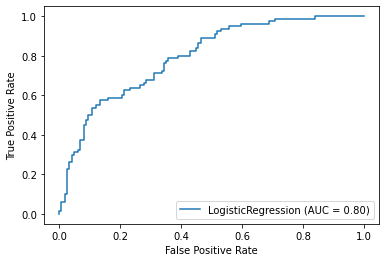

In [23]:
lr_disp = plot_roc_curve(log_model, X_test, y_test)

In [24]:
# Cross-Validation Accuracy sccore
score = cross_val_score(log_model, X, y, cv=10)
score

array([0.72727273, 0.76623377, 0.80519481, 0.71428571, 0.75324675,
       0.75324675, 0.80519481, 0.80519481, 0.75      , 0.82894737])

In [25]:
score.mean()

0.7708817498291183

<h5>Interpretations:</h5>
<blockquote>
    <ul>
        <li>Logistic Regression Model's Confusion Matix have <b>124 True Positive (53.68%)</b>, <b>33 False Positive (14.29%)</b>, <b>27 False Negative (11.69%)</b>, <b>47 True Negative (20.35%)</b>.</li>
        <li>Logistic Regression Model have 14.29% Type I error and 11.69% Type II error.</li>
        <li>Area under the curve (AUC) for Logistic Regression Model is 0.80</li>
        <li>Logistic Regression Model have Accuracy of 77.09%</li>
    </ul>
</blockquote>

<h3>K Nearest Neighbors</h3><a id="7B"></a>

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
prediction2 = knn_model.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[111  40]
 [ 34  46]]


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       151
           1       0.53      0.57      0.55        80

    accuracy                           0.68       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.68      0.68       231



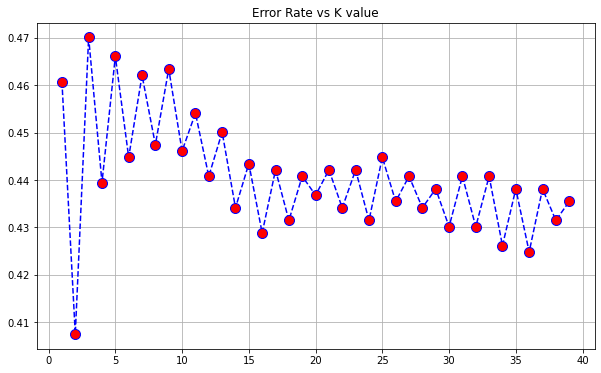

In [27]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test.values.reshape(231,1)))
    
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel = ('K')
plt.ylabel = ('Error Rate')

In [28]:
knn_model = KNeighborsClassifier(n_neighbors= 2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

<AxesSubplot:>

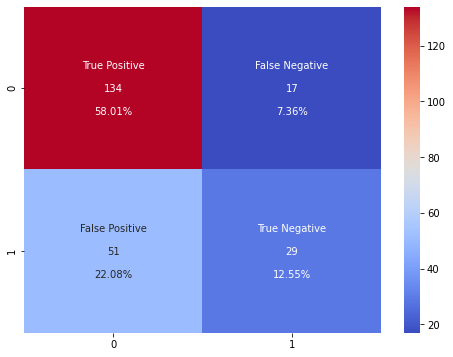

In [29]:
prediction_2 = knn_model.predict(X_test)
cf_matrix = confusion_matrix(y_true= y_test, y_pred= prediction_2)

plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, annot= cm_text_generator(cf= confusion_matrix(y_true= y_test, y_pred= prediction_2)), fmt="", \
            cmap='coolwarm', xticklabels=categories, yticklabels= categories)

In [30]:
print("Classification Report:\n\n", classification_report(y_true= y_test, y_pred= prediction_2))

Classification Report:

               precision    recall  f1-score   support

           0       0.72      0.89      0.80       151
           1       0.63      0.36      0.46        80

    accuracy                           0.71       231
   macro avg       0.68      0.62      0.63       231
weighted avg       0.69      0.71      0.68       231



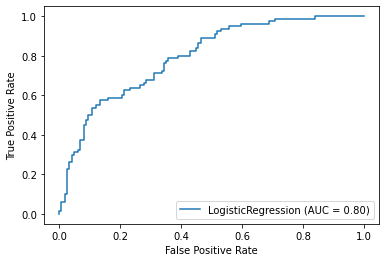

In [31]:
plot_roc_curve(log_model, X_test, y_test)

In [32]:
score = cross_val_score(knn_model, X, y, cv=10)
score

array([0.63636364, 0.75324675, 0.68831169, 0.68831169, 0.68831169,
       0.75324675, 0.76623377, 0.72727273, 0.68421053, 0.73684211])

In [33]:
score.mean()

0.7122351332877648

<h5>Interpretations:</h5>
<blockquote>
    <ul>
        <li>K Nearest Neighbors Model's Confusion Matix have <b>134 True Positive (58.01%)</b>, <b>51 False Positive (22.08%)</b>, <b>17 False Negative (7.36%)</b>, <b>29 True Negative (12.55%)</b>.</li>
        <li>K Nearest Neighbors Model have 22.08% Type I error and 7.36% Type II error.</li>
        <li>Area under the curve (AUC) for K Nearest Neighbors Model is 0.80</li>
        <li>K Nearest Neighbors Model have Accuracy of 71.22%</li>
    </ul>
</blockquote>

<h3>Support Vectors Classifier</h3><a id="7C"></a>

In [34]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)
prediction3 = svc_model.predict(X_test)  

print('Confusion Matrix:\n', confusion_matrix(y_test, prediction3))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction3))

Confusion Matrix:
 [[130  21]
 [ 42  38]]


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.80       151
           1       0.64      0.47      0.55        80

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



<h4>Hyper Paramter Optimization</h4>

In [35]:
## Hyper Parameter Optimization
params= {'C'      :[0.1, 1, 10, 100, 1000],
         'gamma'  :[1, 0.1, 0.01, 0.001, 0.0001],
         'kernel' : ['linear', 'rbf'],
         'degree' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [36]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator= svc_model, param_distributions= params, cv=5, verbose=2)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] kernel=rbf, gamma=0.0001, degree=0, C=0.1 .......................
[CV] ........ kernel=rbf, gamma=0.0001, degree=0, C=0.1, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, degree=0, C=0.1 .......................
[CV] ........ kernel=rbf, gamma=0.0001, degree=0, C=0.1, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, degree=0, C=0.1 .......................
[CV] ........ kernel=rbf, gamma=0.0001, degree=0, C=0.1, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, degree=0, C=0.1 .......................
[CV] ........ kernel=rbf, gamma=0.0001, degree=0, C=0.1, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, degree=0, C=0.1 .......................
[CV] ........ kernel=rbf, gamma=0.0001, degree=0, C=0.1, total=   0.0s
[CV] kernel=rbf, gamma=0.01, degree=4, C=100 .........................
[CV] .......... kernel=rbf, gamma=0.01, degree=4, C=100, total=   0.0s
[CV] kernel=rbf, gamma=0.01, degree=4, C=100 .........................
[CV] .......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... kernel=linear, gamma=0.0001, degree=5, C=0.1, total=   0.1s
[CV] kernel=linear, gamma=0.0001, degree=5, C=0.1 ....................
[CV] ..... kernel=linear, gamma=0.0001, degree=5, C=0.1, total=   0.1s
[CV] kernel=linear, gamma=0.0001, degree=5, C=0.1 ....................
[CV] ..... kernel=linear, gamma=0.0001, degree=5, C=0.1, total=   0.1s
[CV] kernel=linear, gamma=0.0001, degree=5, C=0.1 ....................
[CV] ..... kernel=linear, gamma=0.0001, degree=5, C=0.1, total=   0.1s
[CV] kernel=linear, gamma=0.0001, degree=5, C=0.1 ....................
[CV] ..... kernel=linear, gamma=0.0001, degree=5, C=0.1, total=   0.2s
[CV] kernel=rbf, gamma=0.0001, degree=7, C=0.1 .......................
[CV] ........ kernel=rbf, gamma=0.0001, degree=7, C=0.1, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, degree=7, C=0.1 .......................
[CV] ........ kernel=rbf, gamma=0.0001, degree=7, C=0.1, total=   0.0s
[CV] kernel=rbf, gamma=0.0001, degree=7, C=0.1 .......................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.8min finished


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'rbf']},
                   verbose=2)

In [37]:
random_search.best_estimator_

SVC(C=100, degree=4, gamma=0.001, kernel='linear')

In [38]:
svc_model = SVC(C=100, degree=4, gamma=0.001, kernel='linear')
svc_model.fit(X_train, y_train)
prediction_3 = svc_model.predict(X_test)
cf_matrix = confusion_matrix(y_true= y_test, y_pred= prediction_3)

<AxesSubplot:>

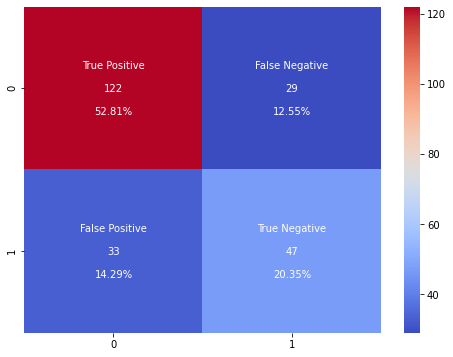

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, annot= cm_text_generator(cf= confusion_matrix(y_true= y_test, y_pred= prediction_3)), fmt="", \
            cmap='coolwarm', xticklabels=categories, yticklabels= categories)

In [40]:
print('Classification Report:\n\n', classification_report(y_true= y_test, y_pred= prediction_3))

Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.62      0.59      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



In [41]:
score = cross_val_score(svc_model, X, y, cv=5)
score

array([0.76623377, 0.72727273, 0.74025974, 0.81699346, 0.78431373])

In [42]:
score.mean()

0.7670146846617435

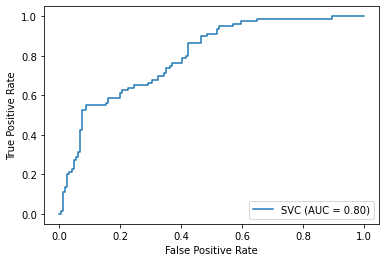

In [43]:
svc_disp = plot_roc_curve(svc_model, X_test, y_test)

<h5>Interpretations:</h5>
<blockquote>
    <ul>
        <li>Support Vectors Classifier Model's Confusion Matix have <b>122 True Positive (52.81%)</b>, <b>33 False Positive (14.29%)</b>, <b>29 False Negative (12.55%)</b>, <b>47 True Negative (20.35%)</b>.</li>
        <li>Support Vectors Classifier Model have 14.29% Type I error and 12.55% Type II error.</li>
        <li>Area under the curve (AUC) for Support Vectors Classifier Model is 0.80</li>
        <li>Support Vectors Classifier Model have Accuracy of 76.70%</li>
    </ul>
</blockquote>

<h3>Random Forest Classifier</h3><a id="7D"></a>

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

prediction4 = rf_classifier.predict(X_test)

In [45]:
print('Confustion Matrix:\n', confusion_matrix(y_true= y_test, y_pred= prediction4))
print('\nClassifiction Report:\n ', classification_report(y_true= y_test, y_pred= prediction4))

Confustion Matrix:
 [[119  32]
 [ 27  53]]

Classifiction Report:
                precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



<h4>Hyper Paramter Optimization</h4>

In [46]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num=10)] 
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [47]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator= rf_classifier, param_distributions= param_grid, cv=5, verbose=2)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.1s
[CV] n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.1s
[CV] n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.1s
[CV] n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.1s
[CV] n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.1s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=5, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [48]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=2,
                       n_estimators=17)

In [49]:
rf_model = RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=2, n_estimators=17)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=2,
                       n_estimators=17)

<AxesSubplot:>

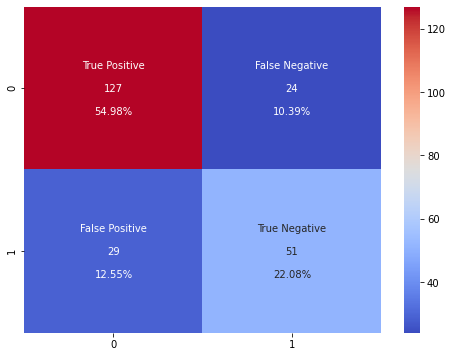

In [50]:
prediction_4 = rf_model.predict(X_test)
cf_matrix = confusion_matrix(y_true= y_test, y_pred= prediction_4)

plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, annot= cm_text_generator(cf= confusion_matrix(y_true= y_test, y_pred= prediction_4)), fmt="", \
            cmap='coolwarm', xticklabels=categories, yticklabels= categories)

In [51]:
print('Classification Report:\n\n', classification_report(y_true= y_test, y_pred= prediction_4))

Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.84      0.83       151
           1       0.68      0.64      0.66        80

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



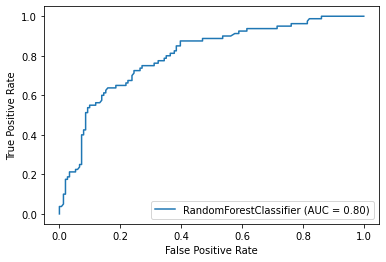

In [52]:
rfc_disp = plot_roc_curve(rf_model, X_test, y_test)

In [53]:
score = cross_val_score(rf_model, X, y, cv=10)
score

array([0.77922078, 0.77922078, 0.76623377, 0.67532468, 0.71428571,
       0.79220779, 0.75324675, 0.83116883, 0.71052632, 0.81578947])

In [54]:
score.mean()

0.7617224880382775

<h5>Interpretations:</h5>
<blockquote>
    <ul>
        <li>Random Forest Classifier Model's Confusion Matix have <b>127 True Positive (54.98%)</b>, <b>29 False Positive (12.55%)</b>, <b>24 False Negative (10.39%)</b>, <b>51 True Negative (22.08%)</b>.</li>
        <li>Random Forest Classifier Model have 12.55% Type I error and 10.39% Type II error.</li>
        <li>Area under the curve (AUC) for Random Forest Classifier Model is 0.80</li>
        <li>Random Forest Classifier Model have Accuracy of 76.17%</li>
    </ul>
</blockquote>

<h3>Gradient Boosting Classifier</h3><a id="7E"></a>

In [55]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train,y_train)

prediction_5 = gb_classifier.predict(X_test)
cf_matrix = confusion_matrix(y_test, prediction_5)

<AxesSubplot:>

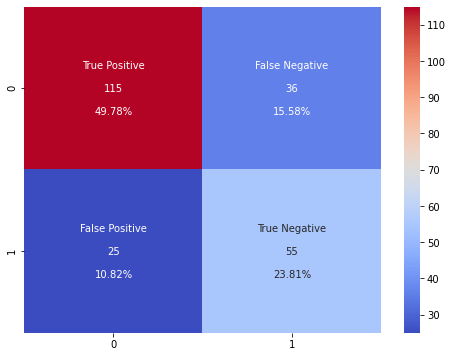

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, annot= cm_text_generator(cf= confusion_matrix(y_true= y_test, y_pred= prediction_5)), fmt="", \
            cmap='coolwarm', xticklabels=categories, yticklabels= categories)

In [57]:
print('Classification Report:\n\n', classification_report(y_test, prediction_5))

Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.76      0.79       151
           1       0.60      0.69      0.64        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



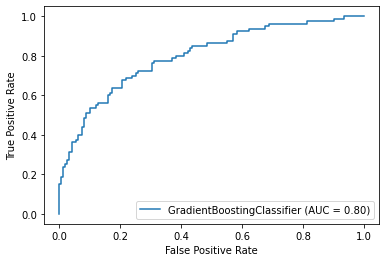

In [58]:
gbc_disp = plot_roc_curve(gb_classifier, X_test, y_test)

In [59]:
score = cross_val_score(gb_classifier, X, y, cv=10)
score

array([0.72727273, 0.80519481, 0.79220779, 0.63636364, 0.75324675,
       0.77922078, 0.77922078, 0.80519481, 0.69736842, 0.81578947])

In [60]:
score.mean()

0.7591079972658921

<h5>Interpretations:</h5>
<blockquote>
    <ul>
        <li>Gradient Boosting Classifier Model's Confusion Matix have <b>115 True Positive (49.78%)</b>, <b>25 False Positive (10.82%)</b>, <b>36 False Negative (15.58%)</b>, <b>55 True Negative (23.81%)</b>.</li>
        <li>Gradient Boosting Classifier Model have 10.82% Type I error and 15.58% Type II error.</li>
        <li>Area under the curve (AUC) for Gradient Boosting Classifier Model is 0.80</li>
        <li>Gradient Boosting Classifier Model have Accuracy of 75.91%</li>
    </ul>
</blockquote>

<h3>Ada Boost Classifier</h3><a id="7F"></a>

In [61]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
adb_classifier = AdaBoostClassifier()
adb_classifier.fit(X_train,y_train)

prediction_6 = adb_classifier.predict(X_test)
cf_matrix = confusion_matrix(y_true= y_test, y_pred= prediction_6)

<AxesSubplot:>

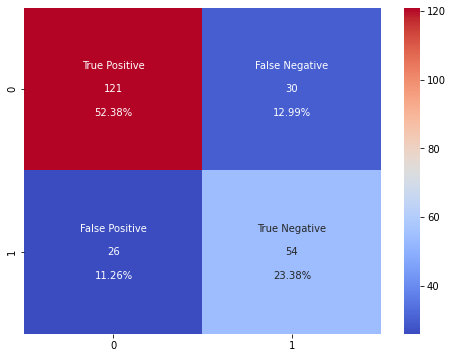

In [62]:
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, annot= cm_text_generator(cf= confusion_matrix(y_true= y_test, y_pred= prediction_6)), fmt="", \
            cmap='coolwarm', xticklabels=categories, yticklabels= categories)

In [63]:
print('Classification Report:\n\n', classification_report(y_true= y_test, y_pred= prediction_6))

Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.68      0.66        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



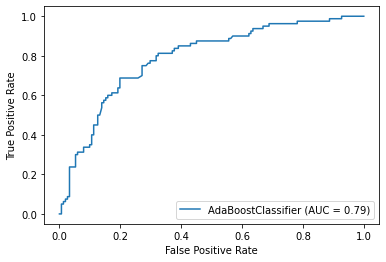

In [64]:
adbc_dip = plot_roc_curve(adb_classifier, X_test, y_test)

In [65]:
score = cross_val_score(adb_classifier, X, y, cv=10)
score

array([0.72727273, 0.75324675, 0.75324675, 0.64935065, 0.77922078,
       0.7012987 , 0.83116883, 0.81818182, 0.71052632, 0.82894737])

In [66]:
score.mean()

0.7552460697197538

<h5>Interpretations:</h5>
<blockquote>
    <ul>
        <li>Ada Boost Classifier Model's Confusion Matix have <b>121 True Positive (52.38%)</b>, <b>26 False Positive (11.26%)</b>, <b>30 False Negative (12.99%)</b>, <b>54 True Negative (23.38%)</b>.</li>
        <li>Ada Boost Classifier Model have 10.82% Type I error and 15.58% Type II error.</li>
        <li>Area under the curve (AUC) for Ada Boost Classifier Model is 0.79</li>
        <li>Ada Boost Classifier Model have Accuracy of 75.52%</li>
    </ul>
</blockquote>

<h3>XG Boost Classifier</h3><a id="7G"></a>

In [67]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

[16:04:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:>

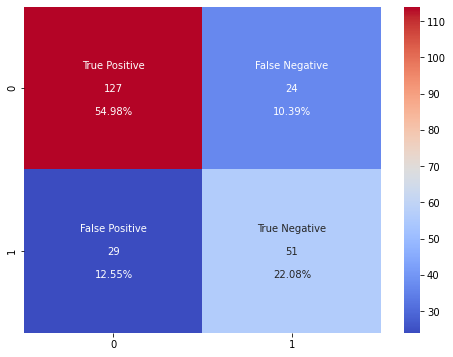

In [68]:
prediction_7 = xgb_model.predict(X_test)
cf_matrix = confusion_matrix(y_true= y_test, y_pred= prediction_7)

plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, annot= cm_text_generator(cf= confusion_matrix(y_true= y_test, y_pred= prediction_4)), fmt="", \
            cmap='coolwarm', xticklabels=categories, yticklabels= categories)

In [69]:
print('Classification Report:\n\n', classification_report(y_true= y_test, y_pred= prediction_7))

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.75      0.79       151
           1       0.60      0.70      0.65        80

    accuracy                           0.74       231
   macro avg       0.71      0.73      0.72       231
weighted avg       0.75      0.74      0.74       231



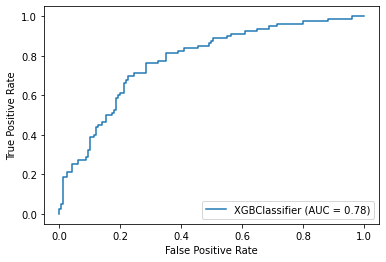

In [70]:
xgb_disp = plot_roc_curve(xgb_model, X_test, y_test)

In [71]:
score = cross_val_score(xgb_model, X, y, cv=10)
score

[16:04:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:04:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:04:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:04:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

array([0.74025974, 0.74025974, 0.72727273, 0.66233766, 0.7012987 ,
       0.75324675, 0.74025974, 0.79220779, 0.68421053, 0.81578947])

In [72]:
score.mean()

0.7357142857142857

<h5>Interpretations:</h5>
<blockquote>
    <ul>
        <li>XG Boost Classifier Model's Confusion Matix have <b>127 True Positive (54.98%)</b>, <b>29 False Positive (12.55%)</b>, <b>24 False Negative (10.39%)</b>, <b>51 True Negative (22.08%)</b>.</li>
        <li>XG Boost Classifier Model have 12.55% Type I error and 10.39% Type II error.</li>
        <li>Area under the curve (AUC) for XG Boost Classifier Model is 0.78</li>
        <li>XG Boost Classifier Model have Accuracy of 73.57%</li>
    </ul>
</blockquote>

<h4>ML Models Accuracy</h4><a id="8"></a>

Following dataframe contain ML Model, with their mean accuracy after cross validation and Area Under the Curve (AUC).

In [74]:
# create a new DataFrame from the above three lists
MLModels_df = pd.DataFrame({"Models": [ 'Logistic Regression', 'K Nearest Neighbors', 'Support Vectors Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Ada Boost Classifier', 'XG Boost Classifier'],
                           "Accuracy": [77.09, 71.22, 76.70, 76.17, 75.91, 75.52, 73.57],
                           "Area Under the Curve": [0.80, 0.80, 0.80, 0.80, 0.80, 0.79, 0.78]})

MLModels_df.set_index('Models', inplace=True)
MLModels_df

,Accuracy,Area Under the Curve
Models,,
Logistic Regression,77.09,0.80
K Nearest Neighbors,71.22,0.80
Support Vectors Classifier,76.70,0.80
Random Forest Classifier,76.17,0.80
Gradient Boosting Classifier,75.91,0.80
Ada Boost Classifier,75.52,0.79
XG Boost Classifier,73.57,0.78


<h3>Gerenate the pickle file</h3><a id="9"></a>

In [75]:
import pickle

# open the file where you want to store
file = open('diabetes_model.pkl', 'wb')

# dump information on that file
pickle.dump(log_model, file)
file.close()